In [199]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# ignore warning
import warnings
warnings.filterwarnings('ignore')

#Load the dataset

In [200]:
df=pd.read_csv('/content/quikr_car.csv')
df.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [201]:
#check the shape of dataset
df.shape

(892, 6)

#understanding the dataset

In [202]:
#information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 892 entries, 0 to 891
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        892 non-null    object
 1   company     892 non-null    object
 2   year        892 non-null    object
 3   Price       892 non-null    object
 4   kms_driven  840 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 41.9+ KB


In [203]:
#data description
df.describe()

,name,company,year,Price,kms_driven,fuel_type
count,892,892,892,892,840,837
unique,525,48,61,274,258,3
top,Honda City,Maruti,2015,Ask For Price,"45,000 kms",Petrol
freq,13,235,117,35,30,440


In [204]:
#check the null value
df.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

#Treating null values:-

In [205]:
#check the unique values of fluel type
df['fuel_type'].unique()

array(['Petrol', 'Diesel', nan, 'LPG'], dtype=object)

In [206]:
#value_counts in fuel type
df['fuel_type'].value_counts()

fuel_type
Petrol    440
Diesel    395
LPG         2
Name: count, dtype: int64

In [207]:
#replace null in highest value count item
df['fuel_type'].fillna(value='Petrol',inplace=True)

In [208]:
#check if any unique data
#df['kms_driven'].unique()

In [209]:
#check the value_count in kms_driven top 5
df['kms_driven'].value_counts().head()

kms_driven
45,000 kms    30
35,000 kms    30
55,000 kms    25
50,000 kms    23
20,000 kms    22
Name: count, dtype: int64

In [210]:
#fill null value in highest value_count iteams
df['kms_driven']=df['kms_driven'].fillna(value='45,000 kms')

In [211]:
#check the null vales if any after treating it
df.isnull().sum()

name          0
company       0
year          0
Price         0
kms_driven    0
fuel_type     0
dtype: int64

#Quality check of dataset:-
1.names are pretty inconsistent\
2.names have company names attached to it\
3.some names are spam like 'Maruti Ertiga showroom condition \4.'with' and 'Well mentained Tata Sumo'\
5.company: many of the names are not of any company like 'Used', 'URJENT', and so on.\
6.year has many non-year values\
7.year is in object. Change to integer\
8.Price has Ask for Price\
9.Price has commas in its prices and is in object\
10.kms_driven has object values with kms at last.\
11.It has nan values and two rows have 'Petrol' in them
12.fuel_type has nan values

#Cleaning the data
-make Quality dataset

In [212]:
#check unique itean if any unwanted values like text
#df['Price'].unique()

In [213]:
#highest valuecounts
df['Price'].value_counts().head()

Price
Ask For Price    35
2,50,000         17
3,50,000         14
1,80,000         13
1,30,000         12
Name: count, dtype: int64

In [214]:
#drop the ask for price in price
df=df[df['Price']!='Ask For Price']

In [215]:
#Price has commas in its prices and is in object
df['Price']=df['Price'].str.replace(',','').astype(int)

In [216]:
#year has many non-year values replace text into year
df['year'].unique()

array(['2007', '2006', '2014', '2012', '2013', '2016', '2015', '2010',
       '2017', '2008', '2018', '2011', '2019', '2009', '2005', '2000',
       '150k', 'TOUR', '2003', 'r 15', '2004', 'sale', '1995', 'ara)',
       '2002', 'SELL', '2001', 'tion', 'odel', '2 bs', 'arry', 'o...',
       'Zest', 'ture', 'emi', 'car', 'able', 'd...', 'SALE', 'sell',
       'd Ex', 'n...', 'e...', 'go .', 'k...', 'o c4', 'zire', 'Sumo',
       'cab', 'EV2', 'r...', 'zest'], dtype=object)

In [217]:
#year has many non-year values
df=df[df['year'].str.isnumeric()]

In [218]:
#year is in object. Change to integer
df['year']=df['year'].astype(int)

In [219]:
#kms_driven unique check if any unusal iteam
#df['kms_driven'].unique()

In [220]:
#kms_driven has object values with kms at last.
df['kms_driven']=df['kms_driven'].str.split().str.get(0).str.replace(',','')

In [221]:
#drop the 'petrol' in kms_driven column
df=df[df['kms_driven']!='Petrol']

In [222]:
#convert kms_driven into int
df['kms_driven']=df['kms_driven'].astype(int)

In [223]:
#check the unique name column
#df['name'].unique()

In [224]:
#Company does not need any cleaning now. Changing car names. Keeping only the first three words
df['name']=df['name'].str.split().str.slice(start=0,stop=3).str.join(' ')

In [225]:
#check company name aany irrregur values
df['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

#check outlier from data then drop it

In [226]:
df.describe()

,year,Price,kms_driven
count,817.000000,8.170000e+02,817.000000
mean,2012.440636,4.115503e+05,46250.714810
std,4.002354,4.749173e+05,34283.745254
min,1995.000000,3.000000e+04,0.000000
25%,2010.000000,1.750000e+05,27000.000000
50%,2013.000000,2.999990e+05,41000.000000
75%,2015.000000,4.900000e+05,56758.000000
max,2019.000000,8.500003e+06,400000.000000


In [227]:
#there are outlier in this dataset 75% car less then 50lakhs suddenly maxprice 85 lakhs remove outlier
#check how many car above 50lakhs
df[df['Price']>5000000]

,name,company,year,Price,kms_driven,fuel_type
562,Mahindra XUV500 W6,Mahindra,2014,8500003,45000,Diesel


In [228]:
#drop outlier price above 50 lakhs
df=df[df['Price']<5000000]

In [229]:
df.shape

(816, 6)

In [230]:
df.head(10)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550,Mahindra,2006,425000,40,Diesel
3,Hyundai Grand i10,Hyundai,2014,325000,28000,Petrol
4,Ford EcoSport Titanium,Ford,2014,575000,36000,Diesel
6,Ford Figo,Ford,2012,175000,41000,Diesel
7,Hyundai Eon,Hyundai,2013,190000,25000,Petrol
8,Ford EcoSport Ambiente,Ford,2016,830000,24530,Diesel
9,Maruti Suzuki Alto,Maruti,2015,250000,60000,Petrol
10,Skoda Fabia Classic,Skoda,2010,182000,60000,Petrol
11,Maruti Suzuki Stingray,Maruti,2015,315000,30000,Petrol


In [231]:
#there are missing index 5 in data reindexing it again and drop previous index
df=df.reset_index(drop=True)

#Data cleaned now save it

In [232]:
df.to_csv('Cleaned_Car_data.csv')

In [234]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    int64 
 3   Price       816 non-null    int64 
 4   kms_driven  816 non-null    int64 
 5   fuel_type   816 non-null    object
dtypes: int64(3), object(3)
memory usage: 38.4+ KB


#Visualize the data

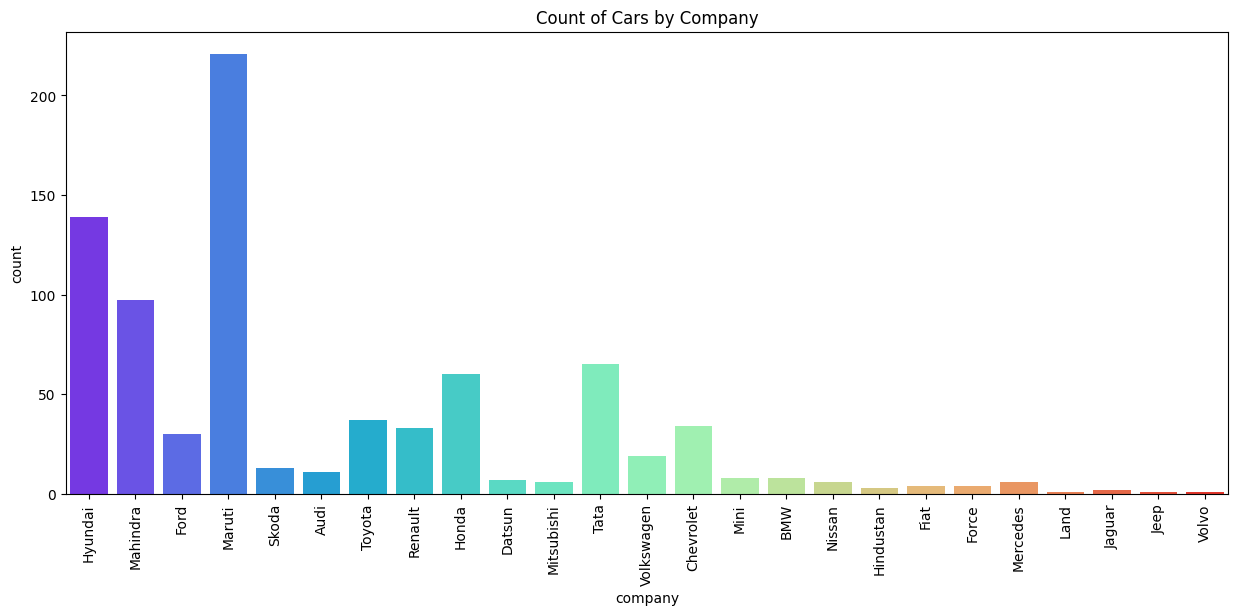

In [239]:
# Bar plot for categorical data
plt.figure(figsize=(15, 6))
sns.countplot(x='company', data=df,palette='rainbow')
plt.title('Count of Cars by Company')
plt.xticks(rotation=90)
plt.show()

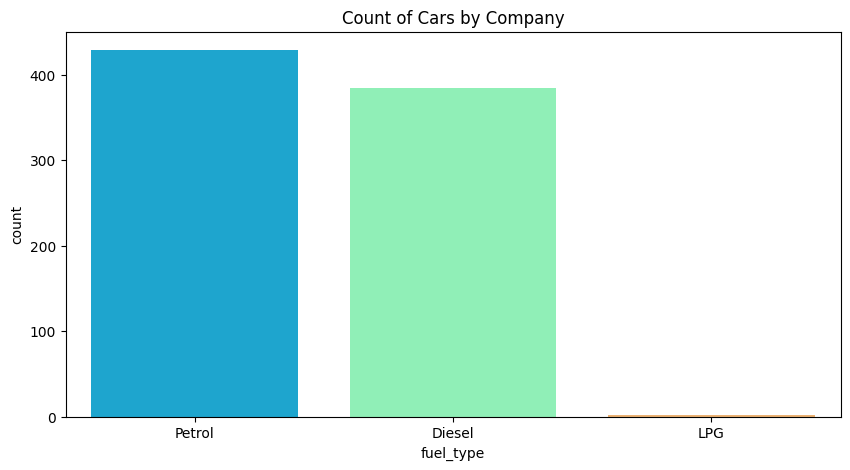

In [243]:
# Bar plot for categorical data
plt.figure(figsize=(10, 5))
sns.countplot(x='fuel_type', data=df,palette='rainbow')
plt.title('Count of Cars by Company')
plt.show()

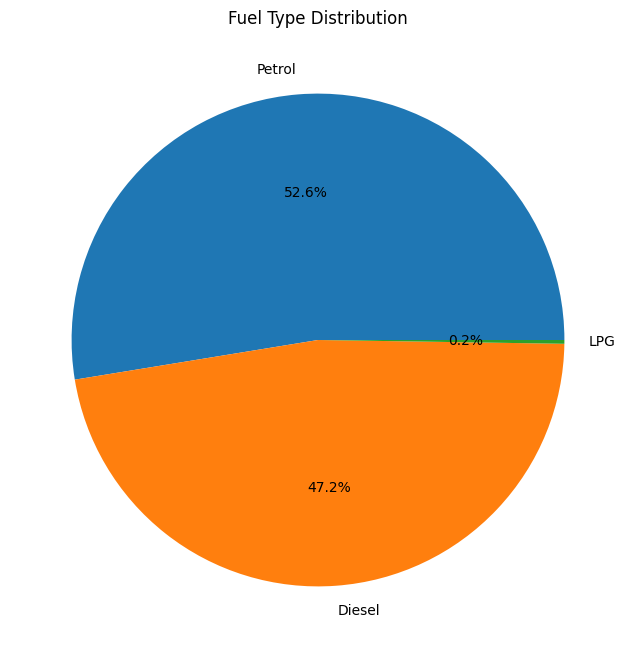

In [248]:
# Pie chart for Fuel distribution in %
fuel_type_counts = df['fuel_type'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(fuel_type_counts, labels=fuel_type_counts.index, autopct='%1.1f%%')
plt.title('Fuel Type Distribution')
plt.show()

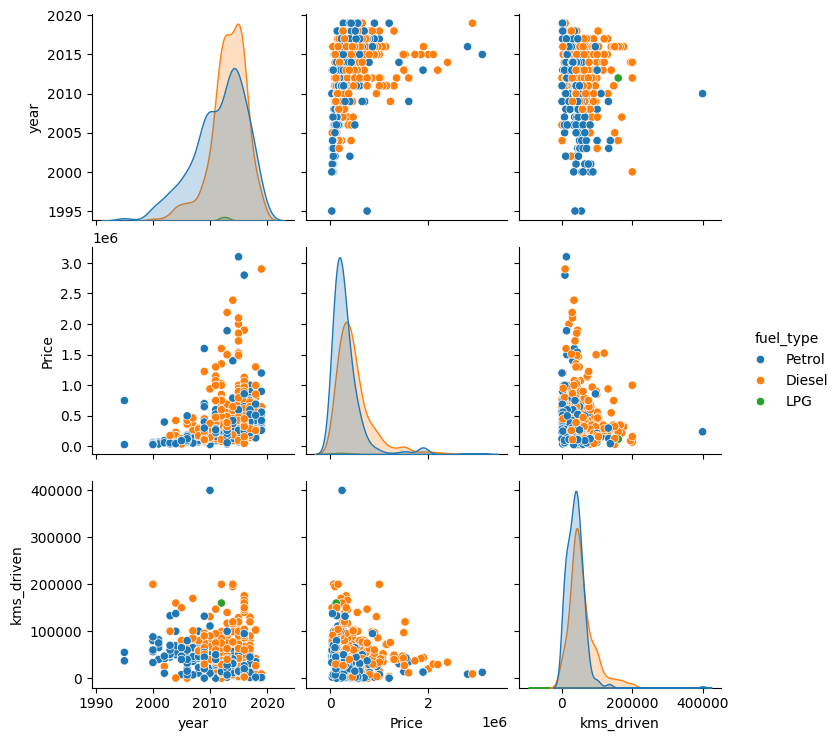

In [244]:
# Pair plot for multivariate analysis
sns.pairplot(df, hue='fuel_type')
plt.show()

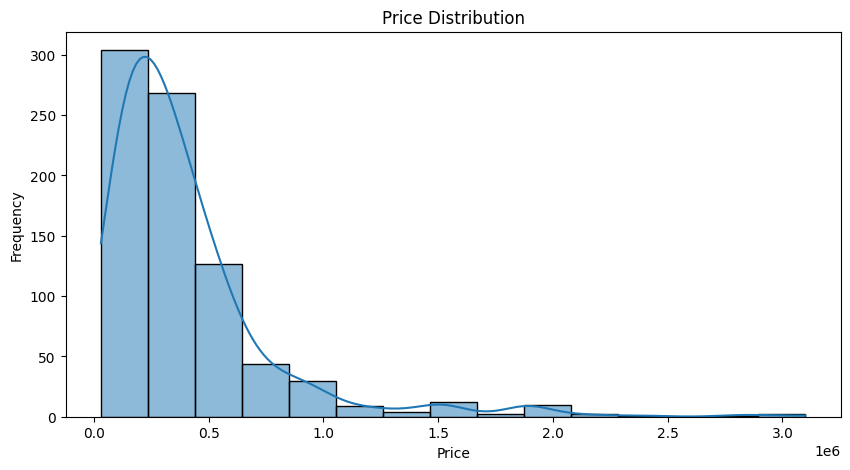

In [252]:
#price distibution along the dataset
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=15, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

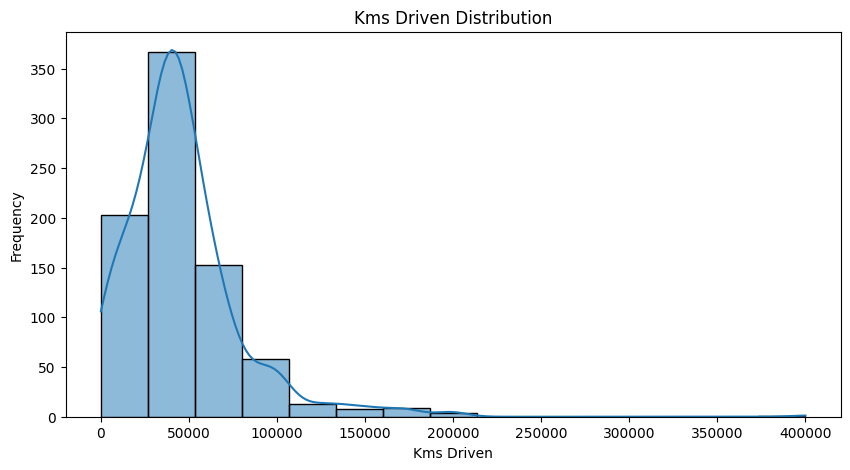

In [254]:
#kms_driven dristribution
plt.figure(figsize=(10, 5))
sns.histplot(df['kms_driven'], bins=15, kde=True)
plt.title('Kms Driven Distribution')
plt.xlabel('Kms Driven')
plt.ylabel('Frequency')
plt.show()

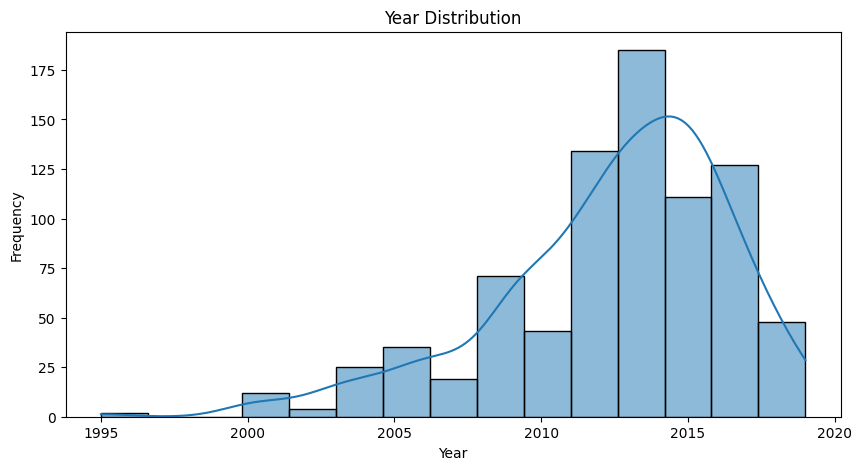

In [255]:
#year disrtibution
plt.figure(figsize=(10, 5))
sns.histplot(df['year'], bins=15, kde=True)
plt.title('Year Distribution')
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.show()

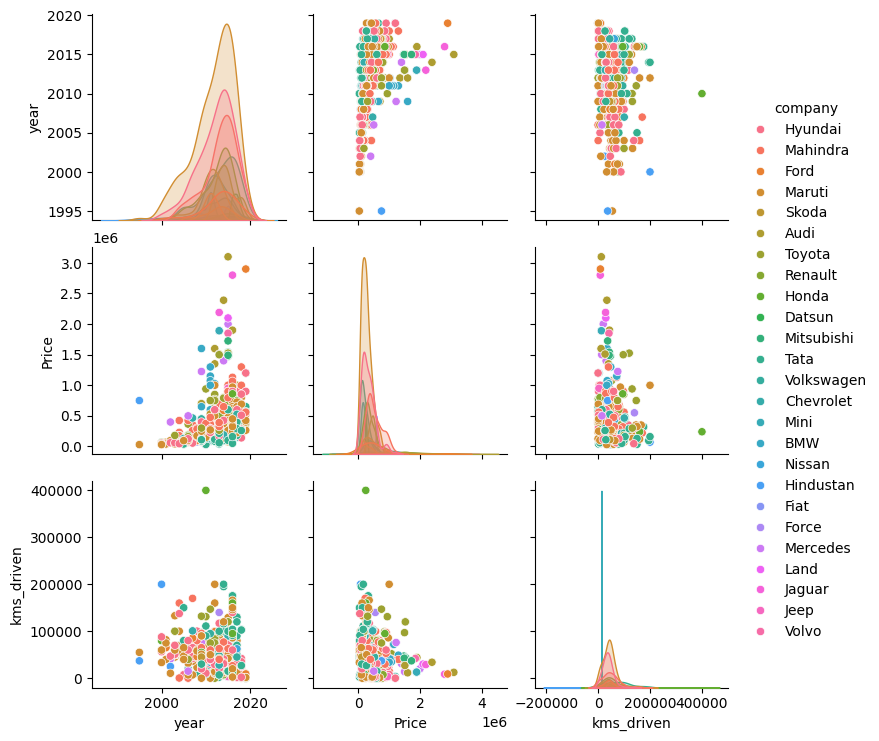

In [256]:
# Pair plot for multivariate analysis
sns.pairplot(df, hue='company')
plt.show()

#Price Distribution by Company

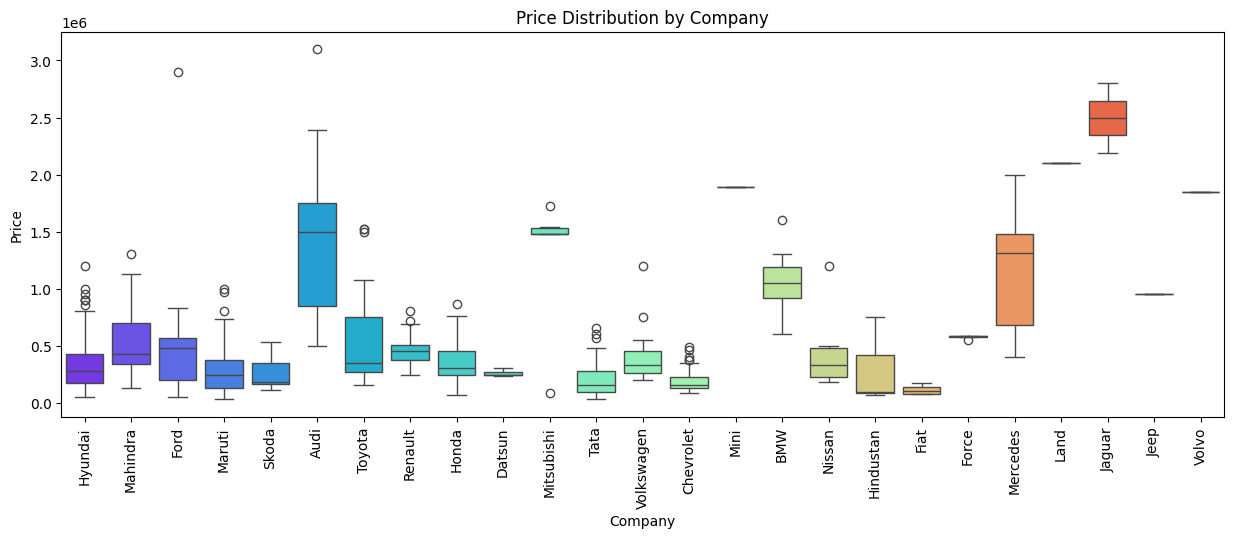

In [260]:
#price according to company
plt.figure(figsize=(15, 5))
sns.boxplot(x='company', y='Price', data=df,palette='rainbow')
plt.title('Price Distribution by Company')
plt.xlabel('Company')
plt.ylabel('Price')
plt.xticks(rotation=90)
plt.show()

#Price Increase or decrease along the Years

<function matplotlib.pyplot.show(close=None, block=None)>

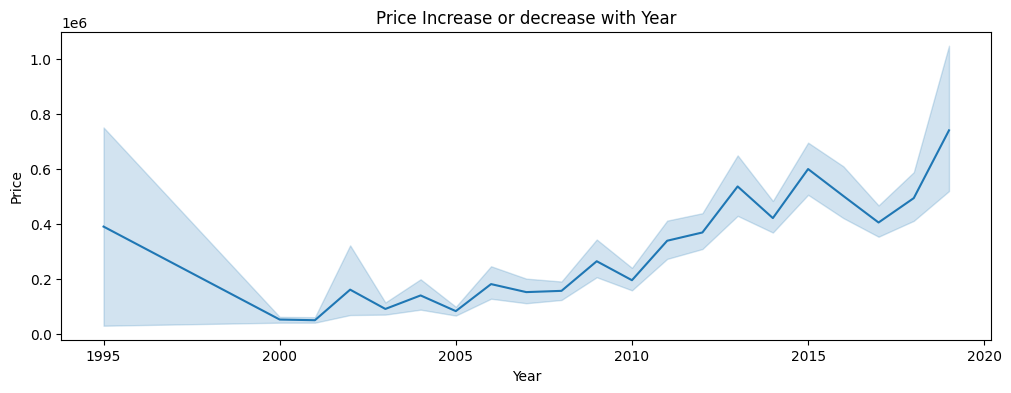

In [265]:
#price increase or decrease with the year
plt.figure(figsize=(12, 4))
sns.lineplot(x='year', y='Price', data=df)
plt.title('Price Increase or decrease with Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show

#Top 10 Car sell Models

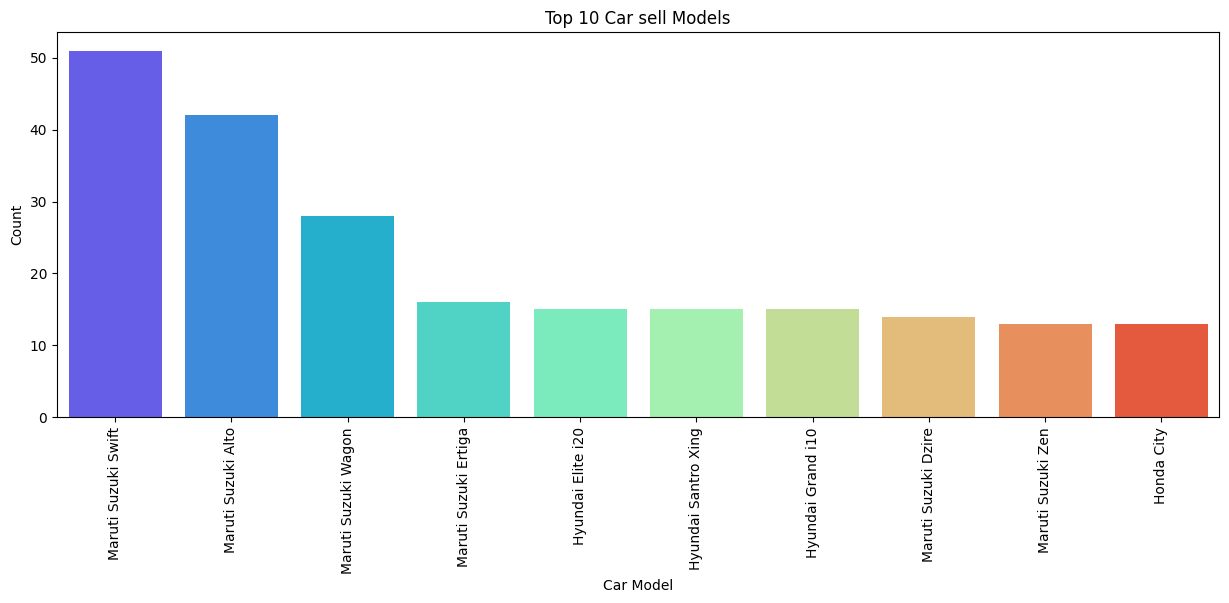

In [268]:
#top 10 model name has highest sell
plt.figure(figsize=(15, 5))
sns.countplot(x='name', data=df, palette='rainbow', order=df['name'].value_counts().index[:10])
plt.title('Top 10 Car sell Models')
plt.xlabel('Car Model')
plt.ylabel('Count')
plt.xticks(rotation=90)
plt.show()

#Top 10 Car Models with Highest Price

In [271]:
#top 10 car model has highest price range/top_10_expensive_cars
# Sort the dataframe by the 'Price' column in descending order
df_sorted = df.sort_values(by='Price', ascending=False)

# Select the top 10 entries
top_10_expensive_cars = df_sorted.head(10)

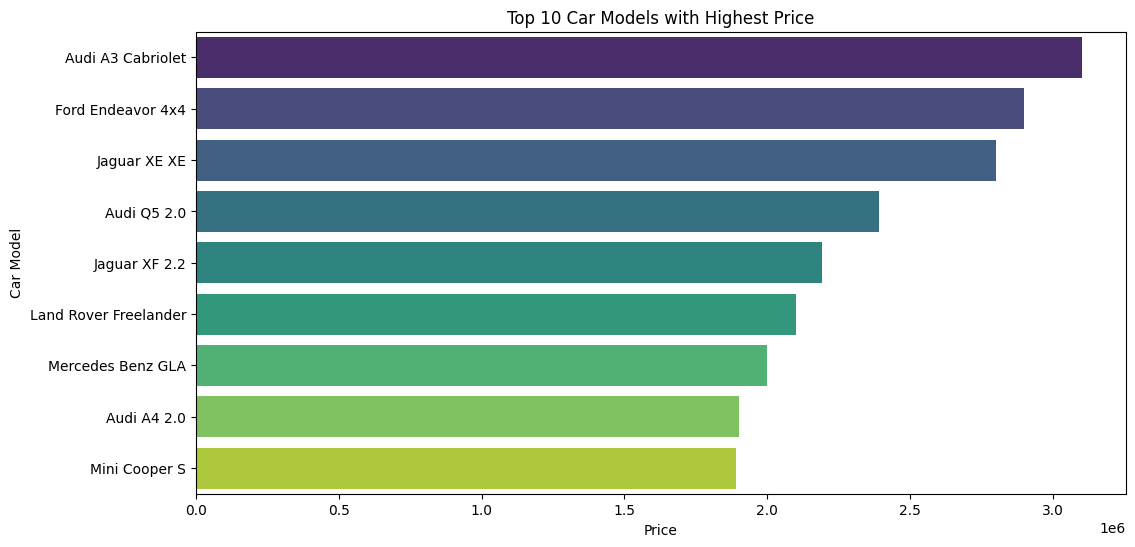

In [272]:
#top_10_expensive_cars
# Create a bar plot for the top 10 expensive cars
plt.figure(figsize=(12, 6))
sns.barplot(x='Price', y='name', data=top_10_expensive_cars, palette='viridis')
plt.title('Top 10 Car Models with Highest Price')
plt.xlabel('Price')
plt.ylabel('Car Model')
plt.show()

#Top 10 Car company with Highest Price

In [278]:
#top 10 car company has highest price range/top_10_expensive_cars company
# Sort the dataframe by the 'Price' column in descending order
df_sorted = df.sort_values(by='Price', ascending=False)

# Select the top 10 entries
top_10_expensive_company = df_sorted.head(10)

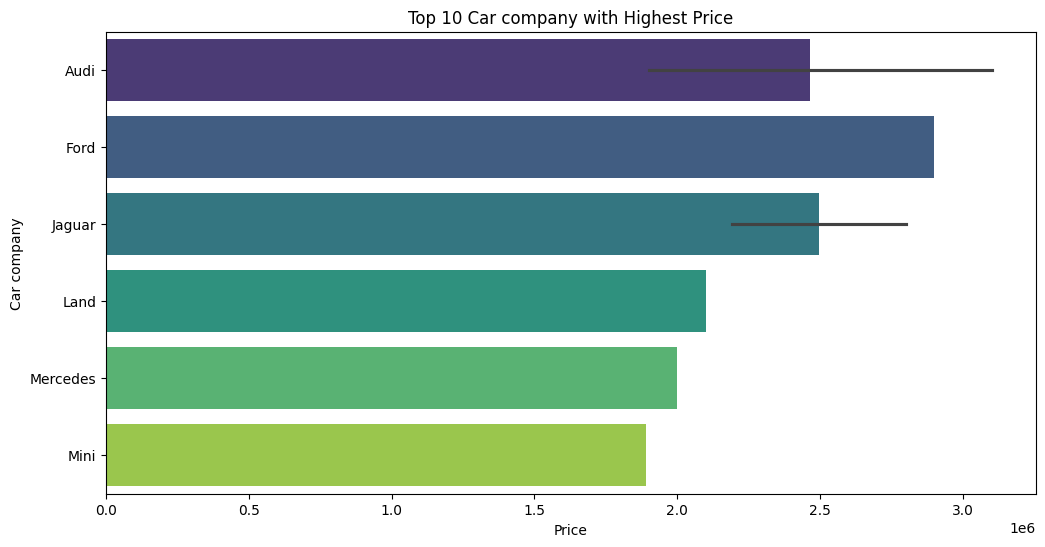

In [279]:
#top_10_expensive_cars company
# Create a bar plot for the top 10 expensive cars comapny
plt.figure(figsize=(12, 6))
sns.barplot(x='Price', y='company', data=top_10_expensive_company, palette='viridis')
plt.title('Top 10 Car company with Highest Price')
plt.xlabel('Price')
plt.ylabel('Car company')
plt.show()

#Top 10 Companies with Highest Kms Driven

In [274]:
# Group by 'company' and calculate the total 'kms_driven' for each company
company_kms_driven = df.groupby('company')['kms_driven'].mean().reset_index()

# Sort the companies by 'kms_driven' in descending order
company_kms_driven_sorted = company_kms_driven.sort_values(by='kms_driven', ascending=False)

# Select the top 10 companies
top_10_companies_kms_driven = company_kms_driven_sorted.head(10)

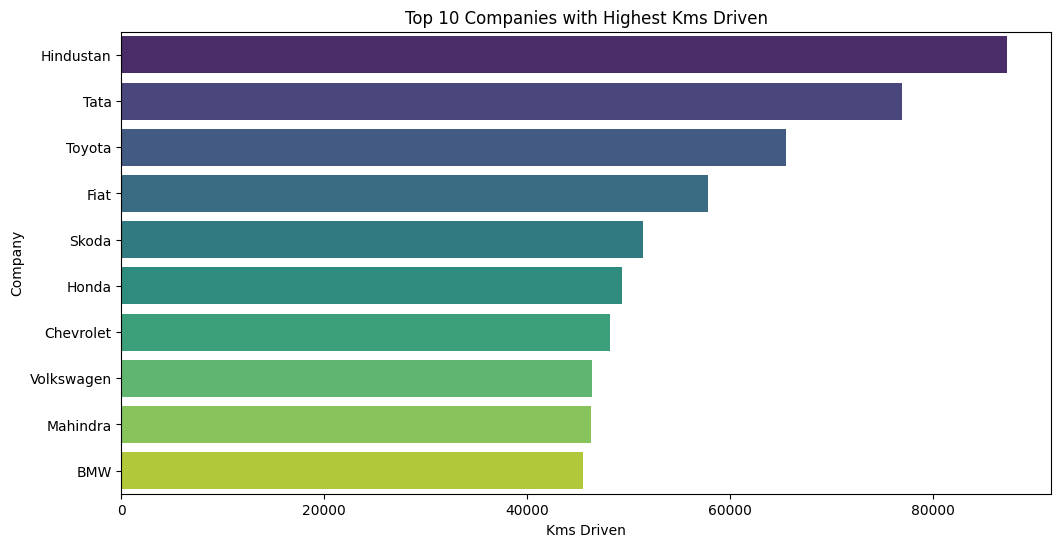

In [275]:
# Create a bar plot for the top 10 companies by kms_driven
plt.figure(figsize=(12, 6))
sns.barplot(x='kms_driven', y='company', data=top_10_companies_kms_driven, palette='viridis')
plt.title('Top 10 Companies with Highest Kms Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Company')
plt.show()

#Top 10 Companies model with Highest Kms Driven

In [276]:
# Group by 'model name' and calculate the total 'kms_driven' for each model name
model_kms_driven = df.groupby('name')['kms_driven'].mean().reset_index()

# Sort the companies by 'kms_driven' in descending order
model_kms_driven_sorted = model_kms_driven.sort_values(by='kms_driven', ascending=False)

# Select the top 10 companies model
top_10_model_kms_driven = model_kms_driven_sorted.head(10)

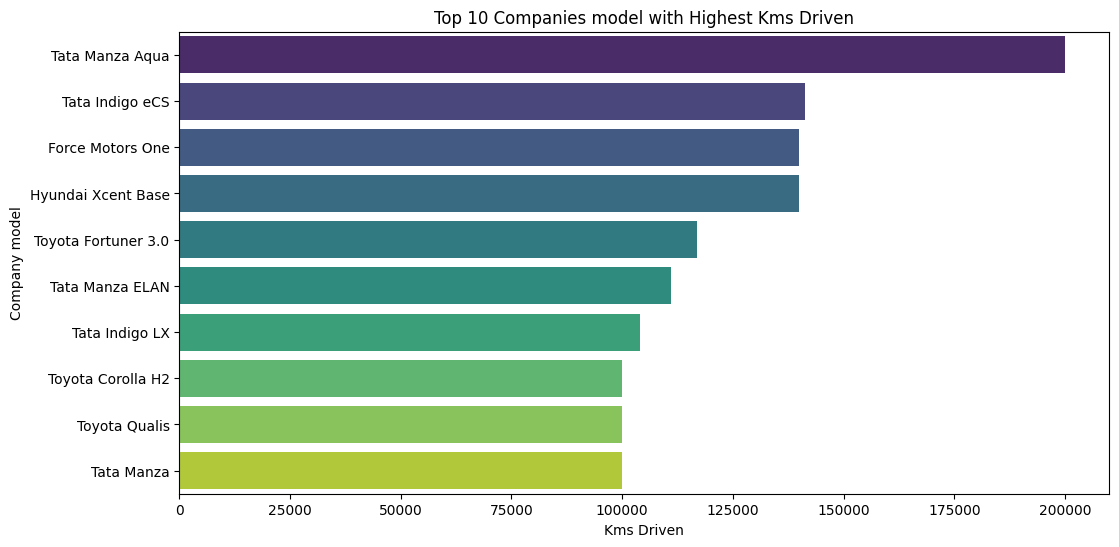

In [277]:
# Create a bar plot for the top 10 companies model by kms_driven
plt.figure(figsize=(12, 6))
sns.barplot(x='kms_driven', y='name', data=top_10_model_kms_driven, palette='viridis')
plt.title('Top 10 Companies model with Highest Kms Driven')
plt.xlabel('Kms Driven')
plt.ylabel('Company model')
plt.show()

#Which fuel_type car has high price

In [282]:
#price with respect to fuel type
price_by_fuel_type = df.groupby('fuel_type')['Price'].mean().reset_index()

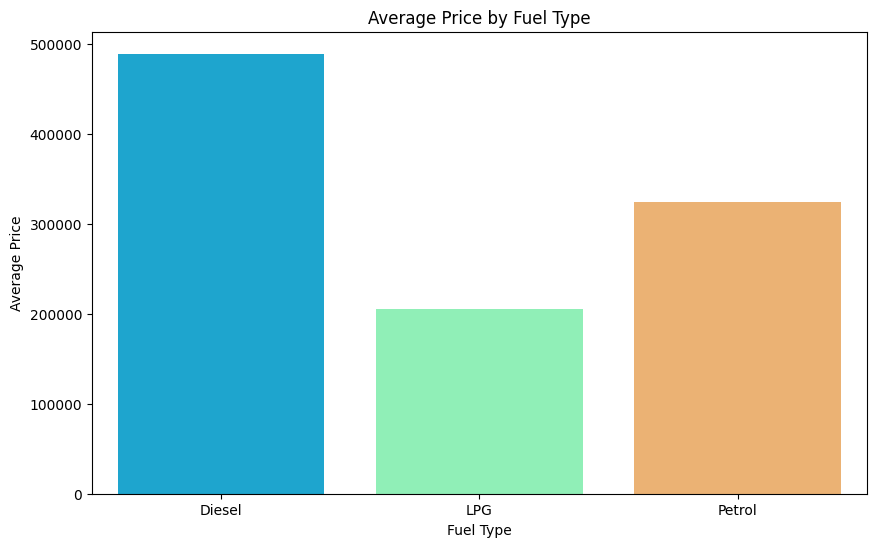

In [283]:
# Create a bar chart for the average price by fuel type
plt.figure(figsize=(10, 6))
sns.barplot(x='fuel_type', y='Price', data=price_by_fuel_type, palette='rainbow')
plt.title('Average Price by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Average Price')
plt.show()

In [280]:
df.columns

Index(['name', 'company', 'year', 'Price', 'kms_driven', 'fuel_type'], dtype='object')